# Risk

***


<div><img src="https://cdn.corporatefinanceinstitute.com/assets/risk3.jpeg" alt="Risk Game", width=640, height=360"></div>

### Description of Assignment

***

### Tasks

The project should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the 
result. One battle round is one shake of the attacker and defender dice.


A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is 
wiped out, and plots the results.


**Rules of Risk**

In each battle round, the attacker can put forward up to three of their troops (This has being assumed to be the 
maximum number of troops 
that an attacker can put forward). 

The defender can use up to two of their defending troops(again this has being assumed to be the maximum number of 
troops that a defender 
can put forward).

Each side looses troops depending on the following rules:

1. The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if 
the attackers dice is higher)
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders 
second highest)
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if 
the attackers dice is higher)

**Examples**

|Attacker rolls|Defender Roll|Attacker Loses|Defender Loses|Explanation|
|---|---|---|---|---|
|6,4,1|5,3|0|2|6 beats 5 and 4 beats 3 (the one is ignored as the lowest)|
|6,6,6|6,3|1|1|Defenders 6 beats the attackers first 6 and the attackers second 6 beats the defenders 3|
|5,4,4|5,4|2|0|The defenders 5 beat the attackers 5 and the defenders 4 beat the attackers 4 (defender wins when the dice are the same)|



### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.


In [1]:
# Import the required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Firstly, we need to create a varialbe to store 3 dice rolls for an attacking player. As there are 6 sides to a dice, we will have make sure that all the numbers generated are integers between the values of 1 and 6. We could generate one array with three dice rolls or have an the numpy `random.randint()` function create an array with 1000*3 dice rolls. We have chosen the latter here.

In [2]:
#Use the randint function to gererate a 1000x3 array of random integers between 1 and 6. 
#This simulates the outcome of rolling a 6-sided dice 3 times for 1000 different attackers.
attacker_dice = np.random.randint(1, 7, (1000, 3))

#Display the attacker_dice array
attacker_dice

array([[3, 3, 6],
       [2, 2, 5],
       [3, 6, 4],
       ...,
       [2, 6, 3],
       [2, 3, 5],
       [5, 4, 5]])

Similarly, we create a variable to store 2 dice rolls for the defending player. Again we have decided to use an 1000x2 array to simulate the results of 1000 defenders dice rolls, where each defender rolls the dice two times.

In [3]:
#Use the randint function to gererate a 1000x2 array of random integers between 1 and 6.
#This simulates the outcome of rolling a 6-sided dice 2 times for 1000 different defenders.
defender_dice = np.random.randint(1, 7, (1000, 2))

#Display the defender_dice array
defender_dice


array([[3, 3],
       [3, 4],
       [5, 6],
       ...,
       [4, 2],
       [6, 1],
       [1, 2]])

We then had to sort the list in descending order. There are various ways we could have achieved this. We could have used the built in python `sorted()` function on as single array if we went down that route when creating our arrays above. The default for this function is to sort lists in ascending order, but by using the `reverse = True` parameter the list will be sorted in descending order. 

Numpy, however in comparison is very efficient at sorting arrays. Therefore we have chosen to use the numpy `np.sort()` to sort our arrays of int arrays below. We use the `axis=1` parameter to sort along the columns, and the `[:, ::-1]` to reverse the order of the columns. This gives us an array in which each set of 3 dice are sorted in descending order. We then do the same for the defender. For more information refer to the official numpy `np.sort` function [here](https://numpy.org/doc/2.1/reference/generated/numpy.sort.html)
 

In [4]:

#Sort the attacker_dice and defender_dice arrays in descending order along the second axis.
#This will allow us to compare the highest dice rolls of the attacker and defender.
attacker_dice = np.sort(attacker_dice, axis=1)[:, ::-1]
defender_dice = np.sort(defender_dice, axis=1)[:, ::-1]

We are only interested in the highest two attacker rolls. Therefore we can now redefine our `attacker_dice` variable to just take the first two columns of the 1000x3 array we have sorted above and create a 1000x2 array of the highest two rolls for each attacker. This has being down using the `[:, :2]` below.

In [5]:
# Take the first two columns of the attacker dice rolls once they are sorted

attacker_dice = attacker_dice[:, :2]
attacker_dice

array([[6, 3],
       [5, 2],
       [6, 4],
       ...,
       [6, 3],
       [5, 3],
       [5, 5]])

Now, that we have created our `attacker_dice` and `defender_dice` for 1000 battles, it is time to sort out the winners and losers. Note that in a battle situation there are only winners and losers, so someone always wins and someone always loses. However, I have taken a liberty of saying in a battle situation, if an attacker wins one battle and a defender wins the second battle, that this is a draw, as each army only lost one of there soldiers in this battle. Therefore, in the next section when you see the draw percentage, this is the amount of times that this type of scenario has occured.

In [6]:
# Create a new matrix to store the results of the battles 
results = np.zeros((1000, 2))
results

# Loop through the dice rolls and compare the results
for i in range(1000):
    for j in range(2):
        if defender_dice[i, j] == attacker_dice[i, j]:
            results[i, 1] += 1
        elif defender_dice[i, j] > attacker_dice[i, j]:
            results[i, 1] += 1
        else:
            results[i, 0] += 1

results

array([[1., 1.],
       [1., 1.],
       [0., 2.],
       ...,
       [2., 0.],
       [1., 1.],
       [2., 0.]])

In [7]:
#Convert the results from a numpy float array to an integer array
results = results.astype(int)
results

# Create a pandas dataframe to store the results

df = pd.DataFrame(results, columns=['Attacker Wins', 'Defender Wins'])

print(df.head())


# Percentage of wins for the 
attacker_percentage = 0
for i in range (1000):
    if df['Attacker Wins'][i] == 2:
        attacker_percentage += 1/1000
print(attacker_percentage)


# Percentage of wins for the defender   
defender_percentage = 0
for i in range (1000):
    if df['Defender Wins'][i] == 2:
        defender_percentage += 1/1000
print(defender_percentage)

# Draw percentage
draw_percentage = 1 - attacker_percentage - defender_percentage
print(draw_percentage)

# Double check the percentages

draw_percentage_check=0
for i in range (1000):
    if df['Attacker Wins'][i] == 1 and df['Defender Wins'][i] == 1:
        draw_percentage_check += 1/1000

print(draw_percentage_check)



   Attacker Wins  Defender Wins
0              1              1
1              1              1
2              0              2
3              0              2
4              0              2
0.3740000000000003
0.2760000000000002
0.3499999999999995
0.35000000000000026


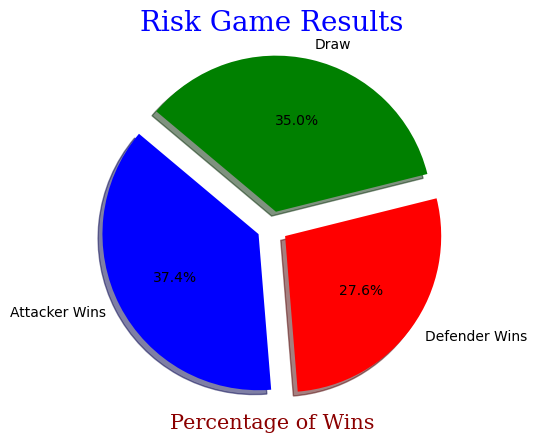

In [8]:
# Plot the results as a pie chart

fig, ax = plt.subplots()

#Set the font style and size for the title and labels
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Set the title of the pie chart
ax.set_title('Risk Game Results', fontdict = font1)

labels= 'Attacker Wins', 'Defender Wins', 'Draw'
sizes = [attacker_percentage, defender_percentage, draw_percentage]
colors = ['blue', 'red', 'green']
explode = (0.1, 0.1, 0.1)  # explode the slices 

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax.set_xlabel('Percentage of Wins', fontdict = font2)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.show()

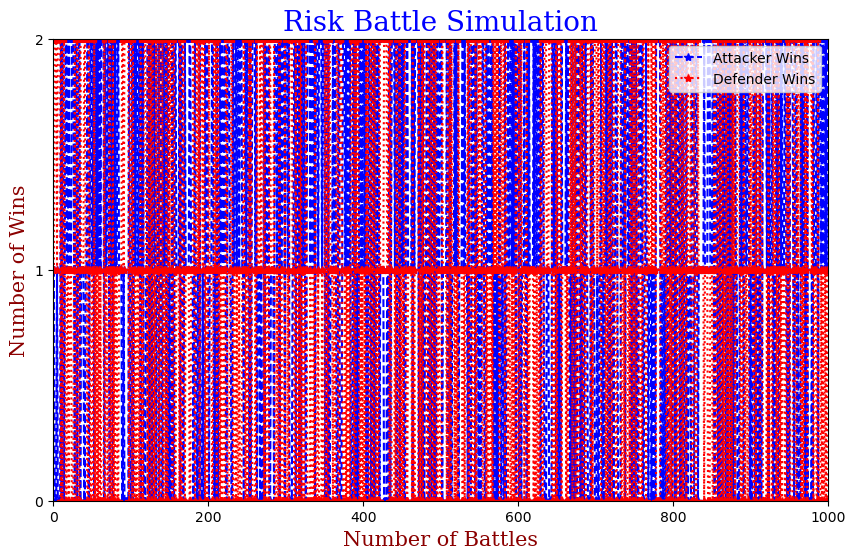

In [9]:
# Plot the results of the battles

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

#Set the font style and size for the title and labels
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

attacker_wins = df['Attacker Wins']
#print(attacker_wins)
defender_wins = df['Defender Wins']
#print(defender_wins)


ax.plot(attacker_wins,  linestyle = 'dashed', marker='*', color='blue', label='Attacker Wins')
ax.plot(defender_wins,  linestyle = 'dotted', marker='*', color='red', label='Defender Wins')

ax.set_title('Risk Battle Simulation', fontdict = font1)
ax.set_xlabel('Number of Battles', fontdict = font2)
ax.set_ylabel('Number of Wins', fontdict = font2)
ax.set_ylim(0, 2)
ax.yaxis.set_ticks(np.arange(0, 3, 1))
ax.set_xlim(0, 1000)
ax.legend()

plt.show()

# More Complicated version

Simulate a full series of rounds for armies of arbitrary size, until one side is wiped out. and plot the results.

In [10]:
# Ask for the number of attacker armies and the number of defender armies

attacker_armies = int(input('Enter the number of attacker armies: '))
defender_armies = int(input('Enter the number of defender armies: '))

attacker_dice = 3
defender_dice = 2

# Smallest number of armies is used to determine the number of battles
if attacker_armies < defender_armies:
    battles = attacker_armies
else:
    battles = defender_armies


In [11]:
# Battle will take place until the attacker or defender has no armies left
# The attacker will roll 3 dice and the defender will roll 2 dice
attackerLosses = [battles*attacker_dice]
defenderLosses = [battles*defender_dice]

startingAttackArmies = (attacker_armies*attacker_dice)
startingDefendArmies = (defender_armies*defender_dice)

attacker_remaining = attacker_armies*attacker_dice
defender_remaining = defender_armies*defender_dice

roundNumber = 1

while attacker_remaining > 3 and defender_remaining > 2:
    attacker_dice = 3
    defender_dice = 2
    attackerRolls = np.random.randint(1, 7, attacker_dice)
    defenderRolls = np.random.randint(1, 7, defender_dice)
    attackerRolls = np.sort(attackerRolls)[::-1]
    defenderRolls = np.sort(defenderRolls)[::-1]
    for i in range(2):
        if defenderRolls[i] >= attackerRolls[i]:
            attacker_remaining -= 1
            attackerLosses.append(1)
        else:
            defender_remaining -= 1
            defenderLosses.append(1)
    roundNumber += 1

print(attackerLosses)
print(defenderLosses)

print(f'Attacker started with {startingAttackArmies} armies and now has {attacker_remaining} armies')
print(f'Defender started with {startingDefendArmies} armies and now has {defender_remaining} armies')


[3000, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## End